In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
# from __future__ import division
import seaborn as sns
%matplotlib inline

In [2]:
file = 'Resources/test.csv'

df = pd.read_csv(file)

df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [3]:
df.columns


Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [4]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [5]:
res_16.head()
feature_table = df.ix[:,:23]

C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [6]:
res_16.tail()

,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
248,14:00,Burnley,Arsenal,0,0,D,0,0,D,C Kavanagh,...,13,2,2,8,11,5,7,1,3,0
249,16:30,Tottenham,Man City,2,0,H,0,0,D,M Dean,...,18,3,5,8,14,2,6,2,3,0
250,12:30,Everton,Crystal Palace,3,1,H,1,0,H,D Coote,...,10,8,2,11,12,4,6,0,1,0
251,17:30,Brighton,Watford,1,1,D,0,1,A,K Friend,...,5,2,2,9,12,3,2,2,2,0
252,14:00,Sheffield United,Bournemouth,2,1,H,1,1,D,J Moss,...,10,6,2,10,8,8,4,2,2,0


In [7]:
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [8]:
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [9]:
res_16 = res_16[:-10]
res_16.shape[0]

243

In [52]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.477366255144033
Average number of goals away 1.2962962962962963
Average number of goals conceded at home 1.2962962962962963
Average number of goals conceded away 1.477366255144033


In [53]:
res_16.head()

,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,...,12,7,5,9,9,11,2,0,2,0
1,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,...,14,3,9,6,13,1,1,2,2,0
2,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,...,8,3,3,10,19,3,4,2,1,0
3,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,...,11,4,3,6,12,2,7,0,0,0
4,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,...,10,2,3,16,14,6,2,2,1,0


In [30]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [75]:
list(res_home)

[('Arsenal',
        Time HomeTeam          AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
  10   12:30  Arsenal           Burnley     2     1   H     1     1   D   
  39   16:30  Arsenal         Tottenham     2     2   D     1     2   A   
  58   16:30  Arsenal       Aston Villa     3     2   H     0     1   A   
  76   14:00  Arsenal       Bournemouth     1     0   H     1     0   H   
  97   16:30  Arsenal    Crystal Palace     2     2   D     2     1   H   
  101  15:00  Arsenal            Wolves     1     1   D     1     0   H   
  121  15:00  Arsenal       Southampton     2     2   D     1     1   D   
  149  20:15  Arsenal          Brighton     1     2   A     0     1   A   
  168  16:30  Arsenal          Man City     0     3   A     0     3   A   
  196  14:00  Arsenal           Chelsea     1     2   A     1     0   H   
  207  20:00  Arsenal        Man United     2     0   H     2     0   H   
  220  15:00  Arsenal  Sheffield United     1     1   D     1     0   H   
  
         

In [79]:
res_home.HomeTeam.head()

0            Liverpool
1             West Ham
2          Bournemouth
3              Burnley
4       Crystal Palace
5              Watford
6            Tottenham
7            Leicester
8            Newcastle
9           Man United
10             Arsenal
11         Aston Villa
12            Brighton
13             Everton
14             Norwich
15         Southampton
16            Man City
17    Sheffield United
18             Chelsea
19              Wolves
20         Aston Villa
21             Norwich
22            Brighton
23          Man United
24    Sheffield United
25             Watford
26           Liverpool
27         Bournemouth
28           Tottenham
29              Wolves
            ...       
70            Brighton
71             Burnley
72           Liverpool
73             Norwich
74             Watford
75            West Ham
76             Arsenal
77            Man City
78         Southampton
79           Newcastle
80             Everton
81         Aston Villa
82         

In [80]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values

In [83]:
table_16.head()

,HomeTeam,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,True,18,14,1.002786,0.888889,18,16,1.142857,0.891365
1,Aston Villa,True,16,16,0.891365,1.015873,21,26,1.333333,1.448468
2,Bournemouth,True,15,10,0.835655,0.634921,19,19,1.206349,1.058496
3,Brighton,True,16,11,0.891365,0.698413,13,21,0.825397,1.169916
4,Burnley,True,16,12,0.891365,0.761905,18,20,1.142857,1.114206


In [86]:
del table_16['Team']

In [87]:
table_16 = table_16.rename(columns={'HomeTeam':'Team'})
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,18,14,1.002786,0.888889,18,16,1.142857,0.891365
1,Aston Villa,16,16,0.891365,1.015873,21,26,1.333333,1.448468
2,Bournemouth,15,10,0.835655,0.634921,19,19,1.206349,1.058496
3,Brighton,16,11,0.891365,0.698413,13,21,0.825397,1.169916
4,Burnley,16,12,0.891365,0.761905,18,20,1.142857,1.114206
5,Chelsea,16,27,0.891365,1.714286,12,22,0.761905,1.225627
6,Crystal Palace,10,12,0.557103,0.761905,13,16,0.825397,0.891365
7,Everton,15,13,0.835655,0.825397,13,22,0.825397,1.225627
8,Leicester,26,28,1.448468,1.777778,14,12,0.888889,0.668524
9,Liverpool,31,25,1.727019,1.587302,9,6,0.571429,0.334262


In [88]:
num_games = res_16.shape[0]/20

In [89]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,18,14,1.002786,0.888889,18,16,1.142857,0.891365
1,Aston Villa,16,16,0.891365,1.015873,21,26,1.333333,1.448468
2,Bournemouth,15,10,0.835655,0.634921,19,19,1.206349,1.058496
3,Brighton,16,11,0.891365,0.698413,13,21,0.825397,1.169916
4,Burnley,16,12,0.891365,0.761905,18,20,1.142857,1.114206
5,Chelsea,16,27,0.891365,1.714286,12,22,0.761905,1.225627
6,Crystal Palace,10,12,0.557103,0.761905,13,16,0.825397,0.891365
7,Everton,15,13,0.835655,0.825397,13,22,0.825397,1.225627
8,Leicester,26,28,1.448468,1.777778,14,12,0.888889,0.668524
9,Liverpool,31,25,1.727019,1.587302,9,6,0.571429,0.334262


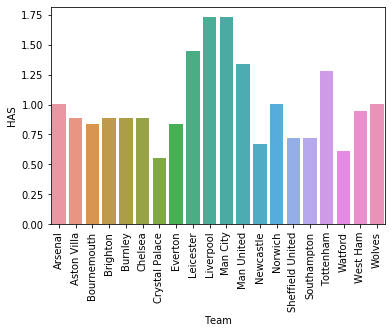

In [91]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [92]:
table_16[table_16.Team == "Liverpool"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
9,Liverpool,31,25,1.727019,1.587302,9,6,0.571429,0.334262


In [93]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [94]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Liverpool,Norwich,H,7,5,1.727019,0.571429,0.380952,1.225627
1,West Ham,Man City,A,3,9,0.947075,1.396825,2.158730,0.835655
2,Bournemouth,Sheffield United,D,3,3,0.835655,1.206349,0.825397,0.668524
3,Burnley,Southampton,H,4,3,0.891365,1.142857,1.142857,0.779944
4,Crystal Palace,Everton,D,2,3,0.557103,0.825397,0.825397,1.225627
5,Watford,Brighton,A,3,3,0.612813,0.888889,0.698413,1.169916
6,Tottenham,Aston Villa,H,7,4,1.281337,0.761905,1.015873,1.448468
7,Leicester,Wolves,D,1,2,1.448468,0.888889,1.079365,0.835655
8,Newcastle,Arsenal,A,2,2,0.668524,0.761905,0.888889,0.891365
9,Man United,Chelsea,H,5,7,1.337047,0.761905,1.714286,1.225627


In [95]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [96]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [97]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
233,Sheffield United,Man City,A,1,5,0.724234,0.698413,2.158730,0.835655,-1
234,Chelsea,Arsenal,D,8,2,0.891365,0.761905,0.888889,0.891365,0
235,Leicester,West Ham,H,8,2,1.448468,0.888889,0.634921,1.002786,1
236,Tottenham,Norwich,H,3,2,1.281337,0.761905,0.380952,1.225627,1
237,Man United,Burnley,A,7,2,1.337047,0.761905,0.761905,1.114206,-1
238,Wolves,Liverpool,A,3,6,1.002786,1.079365,1.587302,0.334262,-1
239,West Ham,Liverpool,A,4,5,0.947075,1.396825,1.587302,0.334262,-1
240,Leicester,Chelsea,D,4,3,1.448468,0.888889,1.714286,1.225627,0
241,Bournemouth,Aston Villa,H,6,5,0.835655,1.206349,1.015873,1.448468,1
242,Crystal Palace,Sheffield United,A,3,3,0.557103,0.825397,0.825397,0.668524,-1


In [98]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

In [104]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [105]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

C:\Users\dntjd\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\dntjd\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
C:\Users\dntjd\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
C:\Users\dntjd\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
C:\Users\dntjd\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
C:\Users\dntjd\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in ve

[0.56       0.52       0.6        0.52       0.36       0.41666667
 0.41666667 0.58333333 0.52173913 0.43478261]
0.4933188405797101


C:\Users\dntjd\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
C:\Users\dntjd\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


In [106]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

C:\Users\dntjd\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


[0.4        0.6        0.44       0.6        0.48       0.45833333
 0.33333333 0.5        0.56521739 0.43478261]
0.48116666666666663


In [107]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.52       0.56       0.52       0.6        0.64       0.54166667
 0.54166667 0.54166667 0.65217391 0.47826087]
0.5595434782608696


In [108]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.52       0.56       0.52       0.68       0.48       0.54166667
 0.45833333 0.66666667 0.60869565 0.43478261]
0.5470144927536232


In [109]:
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [110]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [111]:
new_fixtures = pd.DataFrame( [['Leicester','Man United','D',0,0,0,0,0,0],
                             ['Burnley','Tottenham','D',0,0,0,0,0,0],
                             ['Swansea','Crystal Palace','D',0,0,0,0,0,0],
                             ['West Ham','Newcastle','D',0,0,0,0,0,0],
                             ['Stoke','West Brom','D',0,0,0,0,0,0],
                             ['Southampton','Huddersfield','D',0,0,0,0,0,0],
                             ['Man City','Bournemouth','D',0,0,0,0,0,0],
                             ['Brighton','Watford','D',0,0,0,0,0,0],
                             ['Everton','Chelsea','D',0,0,0,0,0,0],
                             ['Arsenal','Liverpool','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [112]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(253, 9)

In [113]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [114]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
252,Leicester,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
251,Burnley,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
250,Swansea,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
249,West Ham,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
248,Stoke,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
247,Southampton,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
246,Man City,Bournemouth,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
245,Brighton,Watford,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
244,Everton,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
243,Arsenal,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# Adding k recent performance metrics. Change value of k.
k = 3
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sy

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)